# Predicting Loan Repayment


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [230]:
# Import the following Libraries
# numpy
# pandas
# matplotlib plotting software
# seaborn 
# Make matplotlib available through all code boxes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# From Sklearn you'll have to look up from where here. 
# Label Encoder, train test split, logisitic regression, confusion_matrix, classification_report,accuracy_score
# DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,  SVC, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# Plotly Express
from sklearn.model_selection import train_test_split



### **2- Getting Data**

In [231]:
# read the data from the csv into a dataframe
df = pd.read_csv('file:///Users/sujian/Downloads/datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv')

In [232]:
# show the top 4 lines of the dataframe
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban


In [233]:
# show the shape of the dataframe
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (367, 12)


##### 2-1-Renaming columns

In [234]:
df.columns = df.columns.str.lower()

In [235]:
# rename all the columns as lowercase strings
# I think code above just solve it?

In [236]:
# rename all the columns so that they all have _ in between any column head with two or more words
df.rename(columns = {'applicantincome':'applicant_income', 'coapplicantincome':'coapplicant income', 'loanamount':'loan_amount'}, inplace = True)

##### 2-2-Checking null values

In [237]:
# Check all the columns to see if they have null values (NaN) and sum them
miss = df.isnull().sum()

we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [238]:
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].mean())   

In [239]:
# fill the null values in the loan amount column with the mean of the loan amount  column
df.fillna(df.mean())

/var/folders/14/lbvqs18x05zg1dpsryd4xggw0000gn/T/ipykernel_966/3208288031.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [240]:
# fill the null values in the  credit history column with the median of the credit history column
df = df.fillna(df.median())

/var/folders/14/lbvqs18x05zg1dpsryd4xggw0000gn/T/ipykernel_966/2532974860.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [241]:
df.dropna(axis=0, inplace=True)

# write down what this column does
# drop rows with null values and makes change in dataframe

In [242]:
# prove there are no more null values in the columns using the same command as above


In [243]:
# show the top 4 lines of the dataframe
df.head(4)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban


In [244]:
# show the new shape of the dataframe
# show the shape of the dataframe
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (324, 12)


In [245]:
# show the information/ statistics on this dataframe
df.describe()

,applicant_income,coapplicant income,loan_amount,loan_amount_term,credit_history
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,4722.080247,1585.432099,136.489291,343.987654,0.851852
std,4876.669061,2415.016656,62.332239,63.596443,0.355796
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2890.750000,0.000000,101.750000,360.000000,1.000000
50%,3788.500000,1054.000000,126.000000,360.000000,1.000000
75%,5010.250000,2416.250000,155.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [246]:
# get statiscal information on the data frame like count/mean/standard deviation etc
# same as df.describe()

##### 2-3-Label Encoder for Dependents

In [247]:
type(df['dependents'].iloc[0])

str

In [248]:
df['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [249]:
model6 = preprocessing.LabelEncoder()

In [250]:
model6.fit(df['dependents'])

LabelEncoder()

In [251]:
df['dependents']= model6.transform(df['dependents'])

Explain what they are doing in this section

### 3-Exploratory Data Analysis

##### 3-1- Visualization

In [252]:
# get the counts of Loan statuses with "Y" in the column
count_Y = 0
for col in df['credit_history']:
    if col == 1:
        count_Y += 1
    

In [253]:
# get the counts of Loan statuses with "N" in the column
count_N = 0
for col in df['credit_history']:
    if col < 1:
        count_N += 1
        
print([count_Y, count_N])

[276, 48]


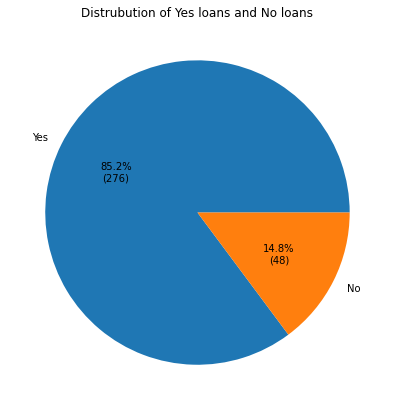

In [254]:
# make a pie plot that shows the distrubution of Yes loans and Y loans
# this plot should have a title, different colors, the percentages inside the sections 

# I think I didn't find the column named 'loan_status'...

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
s = ['Yes', 
     'No']
 
YN = [count_Y, count_N]
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
    
fig = plt.figure(figsize =(10, 7))
plt.pie(YN, labels = s, autopct = lambda pct: func(pct, YN))
 
plt.title("Distrubution of Yes loans and No loans")
plt.show()


69% of applicants repay the loan and 39% do not repay the loan.

In [255]:
# make six bar charts that create the basica comparisons listed below
# each should have legends, and as different colors as possible.
# Plots 1 and 4 should have y labels and ticks while the rest of them should not

plt.figure(figsize=(15,10))


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

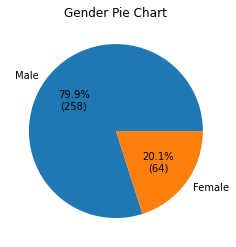

In [256]:
count_M = 0
count_F = 0
for col in df['gender']:
    if col == 'Male':
        count_M += 1
    else:
        count_F += 1

plt.pie([count_M, count_F], labels = ['Male', 'Female'], autopct = lambda pct: func(pct, YN))
 
plt.title("Gender Pie Chart")
plt.show()

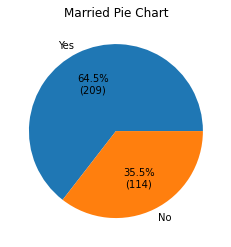

In [257]:
count_y = 0
count_n = 0
for col in df['married']:
    if col == 'Yes':
        count_y += 1
    else:
        count_n += 1

plt.pie([count_y, count_n], labels = ['Yes', 'No'], autopct = lambda pct: func(pct, YN))
 
plt.title("Married Pie Chart")
plt.show()

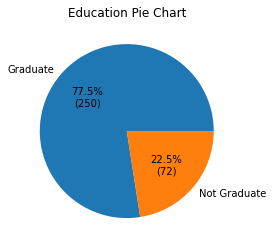

In [258]:
count_G = 0
count_NG = 0
for col in df['education']:
    if col == 'Graduate':
        count_G += 1
    else:
        count_NG += 1

plt.pie([count_G, count_NG], labels = ['Graduate', 'Not Graduate'], autopct = lambda pct: func(pct, YN))
 
plt.title("Education Pie Chart")
plt.show()

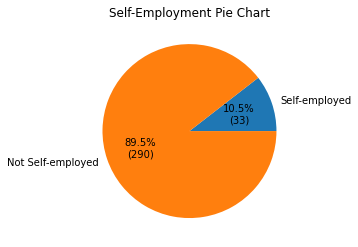

In [259]:
count_S = 0
count_NS = 0
for col in df['self_employed']:
    if col == 'Yes':
        count_S += 1
    else:
        count_NS += 1

plt.pie([count_S, count_NS], labels = ['Self-employed', 'Not Self-employed'], autopct = lambda pct: func(pct, YN))
 
plt.title("Self-Employment Pie Chart")
plt.show()

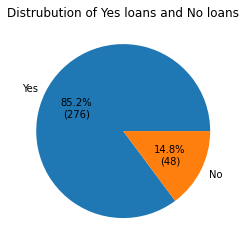

In [260]:
s = ['Yes', 
     'No']
YN = [count_Y, count_N]  
plt.pie(YN, labels = s, autopct = lambda pct: func(pct, YN))
plt.title("Distrubution of Yes loans and No loans")
plt.show()

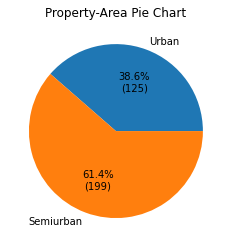

In [261]:
count_U = 0
count_SE = 0
for col in df['property_area']:
    if col == 'Urban':
        count_U += 1
    else:
        count_SE += 1

plt.pie([count_U, count_SE], labels = ['Urban', 'Semiurban'], autopct = lambda pct: func(pct, YN))
 
plt.title("Property-Area Pie Chart")
plt.show()

Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [262]:
import plotly.express as px

px.sunburst(data_frame = df, path=['gender','loan_status'], color='loan_amount')
# I think I didn't find the column named 'loan_status'...

# try this code to see if it works. Can you fix it

ValueError: Value of 'path_1' is not the name of a column in 'data_frame'. Expected one of ['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'] but received: loan_status

In [263]:
plt.figure(figsize=(15,10))

# create violin plots that have the six features shown above in the x value and loan amount in the y value
# Plots 1 and 4 should have y labels and ticks while the rest of them should not



<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [264]:
plt.figure(figsize=(18,5))

# Make three subplots that show frequency distributions of applicant incomes, co-applicant incomes and loan amounts
# these should have lines and bars


<Figure size 1296x360 with 0 Axes>

<Figure size 1296x360 with 0 Axes>

In [265]:
px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

# try this command and see if it works

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'] but received: co-applicant_income

##### 3-2-Encoding

###### 3-2-1-gender

In [269]:
model1=preprocessing.LabelEncoder()

In [275]:
model1.fit(df['gender'])

LabelEncoder()

In [271]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [273]:
model2=preprocessing.LabelEncoder()

In [274]:
model2.fit(df['married'])

LabelEncoder()

In [276]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [277]:
model3=preprocessing.LabelEncoder()

In [278]:
model3.fit(df['education'])

LabelEncoder()

In [279]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [280]:
model4=preprocessing.LabelEncoder()

In [281]:
model4.fit(df['self_employed'])

LabelEncoder()

In [282]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [284]:
model5=preprocessing.LabelEncoder()

In [ ]:
model5.fit(df['property_area'])

In [ ]:
df['property_area']= model5.transform(df['property_area'])

###### 3-2-6-loan status

In [285]:
model6=preprocessing.LabelEncoder()

In [286]:
model6.fit(df['loan_status'])

KeyError: 'loan_status'

In [287]:
df['loan_status']= model6.transform(df['loan_status'])

KeyError: 'loan_status'

In [288]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,Urban


Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

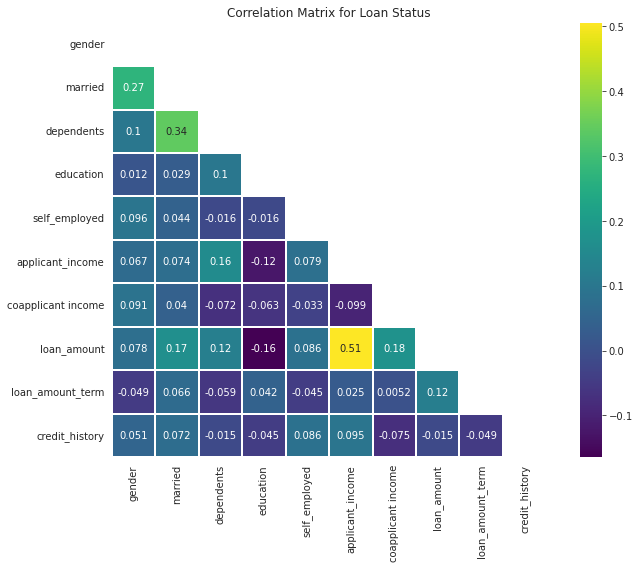

In [289]:
plt.figure(figsize=(12,8))

corr = df.corr()  #L1
mask = np.zeros_like(corr) #L2
mask[np.triu_indices_from(mask)] = True #L3
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

Explain what the encoder does here

Explain what this plot would do if it did not include L1, L2, L3

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### 4-Prediction

##### 4-1-LogisticRegression

In [ ]:
# Set a variable equal to the dataframe that has dropped the columns loan_id, and loan_status
# Hint: might want to control axis
# set 2nd variable equal to the dataframe with a singular feature loan status



In [ ]:
# Perform a train test split

In [ ]:
# set a variable equal to a logistic regression model

In [ ]:
# fit your model to the training set

In [ ]:
# set a variable to the logistic regression prediction of the test set
# basically if your variables were X and y the use logistic regression to predict X-test


In [ ]:
print(confusion_matrix(y_test,lr_prediction))

# Explain confusion matrix


print('\n')
print(classification_report(y_test,lr_prediction))

# Explain classification report

print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

# Do you feel like this is an accurate model?

# 4-2-More models

### Decision Tree Classifier

In [ ]:
# Use this Decision Tree Classifier Model to complete the same thing on 

# Random Forest Classifier
# K Nearest Neighbors
# SVC


In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
dt_prediction=dt.predict(X_test)

In [ ]:
# Confusion Matrix and Model Accuracy

print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

##### 4-3-Random Forest

In [ ]:
# Box for model


In [ ]:
# Box for fit



In [ ]:
# Box for prediction




In [ ]:
# Box for Confusion Matrix and Model Accuracy



##### 4-4-KNearest Neighbors

In [ ]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [ ]:
# Run the above two boxes to get the number of necessary nearest neighbors
# Please look up what would tell you what number to use from this 

In [ ]:
# Get Number from above cells

knn=KNeighborsClassifier(n_neighbors=?)

In [ ]:
# Box for fitting 


In [ ]:
# Box for predictions


In [ ]:
# Box for Confusion Matrix and Model Accuracy



##### 4-5-SVC

In [ ]:
# Box for model



In [ ]:
# Box for fitting 



In [ ]:
# Box for predicting


In [ ]:
# Box for Confusion Matrix and Model Accuracy

In [ ]:
# Using the example for logistic regression please print the accuracy scores for the 5 models you used.
# Please Let me know you conclusions in the last box. 
# one about the data
# the second about which model is best

print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))


### CONCLUSION

1. Tell me what you learned from the data

2. Which model is best and why?: